In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="linear-regression-house-price-prediction"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>LINEAR REGRESSION FOR HOUSE PRICE PREDICTION</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    In this notebook, we will build different linear regression models for California house price prediction:
    <br><br>
    1. Explore California Housing Dataset
    <br>
    2. Linear regression (with normal equation and iterative optimization)
    <br>
    3. Polynomial regression
    <br>
    4. Regularized regression models - ridge and lasso
    <br><br>
    We will set regularization rate and polynomial degree with hyper-parameter tuning and cross-validation.
    <br><br>
    We will compare different models in terms of their parameter vectors and mean absolute error on train, development, and test sets.
</p>
</div>

<a id="california-housing-dataset"></a>
<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>CALIFORNIA HOUSING DATASET</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    This notebook introduces the California Housing dataset that we will be using for regression demonstrations.
    <br><br>
    We also list down the steps for typical dataset exploration, which can be broadly applied to any dataset.
</p>
</div>


In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.simplefilter("ignore", ConvergenceWarning)

In [3]:
warnings.filterwarnings("ignore")

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
california_housing = fetch_california_housing(as_frame=True)

In [3]:
type(california_housing)

sklearn.utils._bunch.Bunch

<a id="bunch-object-attributes"></a>
<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>BUNCH OBJECT ATTRIBUTES</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    The <code>bunch</code> object is a dictionary-like object with the following attributes:
    <br><br>
    * <code>data</code>, which is a pandas object (since <code>as_frame=True</code>). Each row corresponds to 8 feature values.
    <br><br>
    * <code>target</code> value contains average house value in units of 100,000. This is also a pandas object (since <code>as_frame=True</code>).
    <br><br>
    * <code>feature_names</code> is an array of ordered feature names used in the dataset.
    <br><br>
    * <code>DESCR</code> contains a description of the dataset.
    <br><br>
    * <code>frame</code> contains a dataframe with data and target.
    <br><br>
    Each of these attributes can be accessed as <code>&lt;bunch_object&gt;.key</code>. In our case, we can access these features as follows:
    <br><br>
    * <code>california_housing.data</code> gives us access to contents of <code>data</code> key.
    <br><br>
    * <code>california_housing.target</code> gives us access to contents of <code>target</code> key.
    <br><br>
    * <code>california_housing.feature_names</code> gives us access to contents of <code>feature_names</code> key.
    <br><br>
    * <code>california_housing.DESCR</code> gives us access to contents of <code>DESCR</code> key.
    <br><br>
    * <code>california_housing.frame</code> gives us access to contents of <code>frame</code> key.
</p>
</div>


# Dataset exploration

In [4]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

<a id="key-statistics"></a>
<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>KEY STATISTICS</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    Note down the key statistics from this description:
    <br><br>
    * There are <strong>20640 examples</strong> in the dataset.
    <br><br>
    * There are <strong>8 numerical attributes</strong> per example.
    <br><br>
    * The target label is the median house value.
    <br><br>
    * There are <strong>no missing values</strong> in this dataset.
</p>
</div>

In [8]:
california_housing.data.shape


(20640, 8)

In [9]:
type(california_housing.data)

pandas.core.frame.DataFrame

In [10]:
california_housing.target.shape

(20640,)

In [11]:
type(california_housing.target)

pandas.core.series.Series

# Feature names  
**Let's find out names of the attributes.**

In [12]:
california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

<a id="attributes-description"></a>
<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>ATTRIBUTES AND THEIR DESCRIPTION</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    Understanding the attributes and their descriptions is crucial for analyzing the dataset:
    <br><br>
    * <strong>MedInc</strong> - Median income in the block.
    <br><br>
    * <strong>HouseAge</strong> - Median house age in the block.
    <br><br>
    * <strong>AveRooms</strong> - Average number of rooms.
    <br><br>
    * <strong>AveBedrms</strong> - Average number of bedrooms.
    <br><br>
    * <strong>Population</strong> - Block population.
    <br><br>
    * <strong>AveOccupancy</strong> - Average house occupancy.
    <br><br>
    * <strong>Latitude</strong> - Latitude of the house block.
    <br><br>
    * <strong>Longitude</strong> - Longitude of the house block.
</p>
</div>


In [13]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
california_housing.target.head()


0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

<a id="dataset-observations"></a>
<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>DATASET OBSERVATIONS</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    We observe that:
    <br><br>
    <ul>
        <li>The dataset contains <strong>20,640 examples</strong> with 8 features.</li>
        <li>All features are numerical features encoded as floating point numbers.</li>
        <li>There are <strong>no missing values</strong> in any features - the <code>Non-Null</code> is equal to the number of examples in the training set.</li>
    </ul>
</p>
</div>

# Feature and target histograms

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

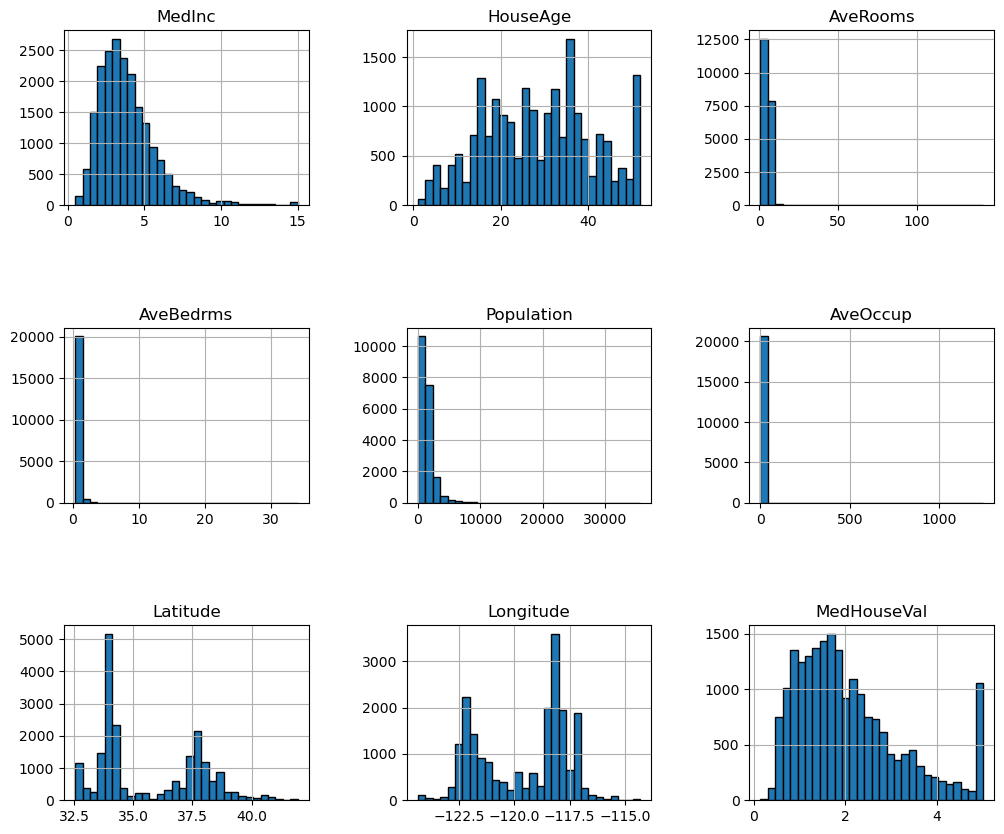

In [17]:
california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

<a id="histogram-observations"></a>
<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>HISTOGRAM OBSERVATIONS</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    Let's observe these histogram and note down our findings:
    <br><br>
    <ul>
        <li><strong>MedInc</strong> has a long tail distribution - salary of people is more or less normally distributed with a few folks getting a high salary.</li>
        <li><strong>HouseAge</strong> has more or less a uniform distribution.</li>
        <li>The range for features, <strong>AveRooms</strong>, <strong>AveBedrms</strong>, <strong>AveOccupancy</strong>, <strong>Population</strong>, is large and it contains a small number of large values (as there are unnoticeable bins on the right in the histogram plots of these features). That would mean that there could be certain outlier values present in these features.</li>
        <li><strong>Latitude</strong> and <strong>Longitude</strong> carry geographical information. Their combination helps us decide the price of the house.</li>
        <li><strong>MedHouseVal</strong> also has a long tail distribution. It spikes towards the end. The reason is that the houses with a price more than 5 are given a value of 5.</li>
    </ul>
</p>
</div>


In [18]:
california_housing.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<a id="outlier-observations"></a>
<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>OUTLIER OBSERVATIONS</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    We can observe that there is a large difference between <code>75%</code> and <code>max</code> values of <strong>AveRooms</strong>, <strong>AveBedrms</strong>, <strong>Population</strong>, and <strong>AveOccupancy</strong> - which confirms our intuition about the presence of outliers or extreme values in these features.
</p>
</div>

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


<a id="imports-regression"></a>
<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>IMPORTS FOR REGRESSION</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    For tackling regression problems, we need to import classes and utilities from the <code>sklearn.linear_model</code> module. This module provides implementations for various regression models, including:
    <ul>
        <li><code>LinearRegression</code></li>
        <li><code>SGDRegressor</code></li>
        <li><code>Ridge</code></li>
        <li><code>Lasso</code></li>
        <li><code>RidgeCV</code></li>
        <li><code>LassoCV</code></li>
    </ul>
    <br>
    Additionally, we need to bring in model selection utilities from the <code>sklearn.model_selection</code> module and metrics from the <code>sklearn.metrics</code> module.
    <br><br>
    Data preprocessing utilities are imported from the <code>sklearn.preprocessing</code> module.
</p>
</div>


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import loguniform
from scipy.stats import uniform

from sklearn.datasets import fetch_california_housing
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [21]:
np.random.seed(306)

**Let's use `ShuffleSplit` as cv with 10 splits and 20% examples set aside as test examples.**

In [22]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

<a id="data-loading-splitting"></a>
<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>DATA LOADING AND SPLITTING</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    The data will be split into three parts:
    <ul>
        <li><strong>Train + Dev</strong>: Used for cross-validation to fine-tune model parameters.</li>
        <li><strong>Test</strong>: Reserved for evaluating the performance of the trained models.</li>
    </ul>
</p>
</div>


In [23]:
# fetch dataset
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)

# train-test split
com_train_features, test_features, com_train_labels, test_labels = train_test_split(
    features, labels, random_state=42)

# train --> train + dev split
train_features, dev_features, train_labels, dev_labels = train_test_split(
    com_train_features, com_train_labels, random_state=42)

<a id="linear-regression-normal-equation"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>LINEAR REGRESSION WITH NORMAL EQUATION</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    In this section, we will utilize the normal equation method to train a linear regression model. This approach allows us to find the optimal coefficients without iterative methods.
    <br><br>
    The pipeline is set up with two key stages:
    <ul>
        <li><strong>Feature Scaling</strong>: To scale the features appropriately.</li>
        <li><strong>Linear Regression</strong>: To perform regression on the transformed feature matrix.</li>
    </ul>
    <br>
    Throughout this notebook, we will follow a consistent pattern for each estimator:
    <ul>
        <li><strong>Pipeline</strong>: Combines data preprocessing and modeling steps.</li>
        <li><strong>cross_validate</strong>: Trains the model using <code>ShuffleSplit</code> cross-validation with <code>neg_mean_absolute_error</code> as the scoring metric.</li>
        <li><strong>Error Reporting</strong>: Converts scores to errors and reports mean absolute errors on the development set.</li>
    </ul>
</p>
</div>

In [24]:
lin_reg_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                             ("lin_reg", LinearRegression())])
lin_reg_cv_results = cross_validate(lin_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

lin_reg_train_error = -1 * lin_reg_cv_results['train_score']
lin_reg_test_error = -1 * lin_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
      f"{lin_reg_train_error.mean():.3f} +/- {lin_reg_train_error.std():.3f}")
print(f"Mean absolute error of linear regression model on the test set:\n"
      f"{lin_reg_test_error.mean():.3f} +/- {lin_reg_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.530 +/- 0.002
Mean absolute error of linear regression model on the test set:
0.527 +/- 0.008


**Both the errors are close, but are not low.  This points to underfitting.  We can address it by adding more feature through polynomial regression.**

<a id="linear-regression-sgd"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>LINEAR REGRESSION WITH SGD</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    In this section, we will employ the Stochastic Gradient Descent (SGD) method to train a linear regression model. This iterative optimization technique is particularly useful when dealing with large datasets.
    <br><br>
    The pipeline is configured with two essential stages:
    <ul>
        <li><strong>Feature Scaling</strong>: To standardize the features.</li>
        <li><strong>SGD Regression</strong>: To perform regression using the transformed feature matrix.</li>
    </ul>
</p>
</div>

In [25]:
sgd_reg_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                             ("sgd_reg", SGDRegressor(
                                 max_iter=int(np.ceil(1e6/com_train_features.shape[0])),
                                 early_stopping=True,
                                 eta0=1e-4,
                                 learning_rate='constant',
                                 tol=1e-5,
                                 validation_fraction=0.1,
                                 n_iter_no_change=5,
                                 average=10,
                                 random_state=42))])

sgd_reg_cv_results = cross_validate(sgd_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

sgd_train_error = -1 * sgd_reg_cv_results['train_score']
sgd_test_error = -1 * sgd_reg_cv_results['test_score']

print(f"Mean absolute error of SGD regression model on the train set:\n"
      f"{sgd_train_error.mean():.3f} +/- {sgd_train_error.std():.3f}")
print(f"Mean absolute error of SGD regression model on the test set:\n"
      f"{sgd_test_error.mean():.3f} +/- {sgd_test_error.std():.3f}")

Mean absolute error of SGD regression model on the train set:
0.534 +/- 0.013
Mean absolute error of SGD regression model on the test set:
0.530 +/- 0.010


<a id="polynomial-regression"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>POLYNOMIAL REGRESSION</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    In this segment, we will explore polynomial regression by training a model with a degree of 2. Additionally, we will use the <code>validation_curve</code> to determine the optimal degree for polynomial models.
    <br><br>
    The <code>PolynomialFeatures</code> function is employed to transform the features to the specified degree (in this case, 2). After transforming the features, we apply feature scaling before training the regression model.
</p>
</div>

In [26]:
poly_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2)),
                              ("feature_scaling", StandardScaler()),
                              ("lin_reg", LinearRegression())])
poly_reg_cv_results = cross_validate(poly_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

poly_reg_train_error = -1 * poly_reg_cv_results['train_score']
poly_reg_test_error = -1 * poly_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
      f"{poly_reg_train_error.mean():.3f} +/- {poly_reg_train_error.std():.3f}")
print(f"Mean absolute error of linear regression model on the test set:\n"
      f"{poly_reg_test_error.mean():.3f} +/- {poly_reg_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.461 +/- 0.003
Mean absolute error of linear regression model on the test set:
0.485 +/- 0.030


<a id="interaction-features-in-polynomial-regression"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>INTERACTION FEATURES IN POLYNOMIAL REGRESSION</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    Upon examining the results, we observe that both the training and validation errors have decreased after utilizing second-order polynomial features in the model.
    <br><br>
    To optimize further, instead of employing all polynomial features, we focus on using only interaction feature terms in the polynomial model. This approach allows us to train a more efficient linear regression model.
</p>
</div>

In [27]:
poly_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2, interaction_only=True)),
                              ("feature_scaling", StandardScaler()),
                              ("lin_reg", LinearRegression())])
poly_reg_cv_results = cross_validate(poly_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

poly_reg_train_error = -1 * poly_reg_cv_results['train_score']
poly_reg_test_error = -1 * poly_reg_cv_results['test_score']

print(f"Mean absolute error of polynomial regression model of degree 2 on the train set:\n"
      f"{poly_reg_train_error.mean():.3f} +/- {poly_reg_train_error.std():.3f}")
print(f"Mean absolute error of polynomial regression model of degree 2 on the test set:\n"
      f"{poly_reg_test_error.mean():.3f} +/- {poly_reg_test_error.std():.3f}")

Mean absolute error of polynomial regression model of degree 2 on the train set:
0.478 +/- 0.003
Mean absolute error of polynomial regression model of degree 2 on the test set:
0.497 +/- 0.024


<a id="choosing-polynomial-degree"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>CHOOSING THE RIGHT POLYNOMIAL DEGREE</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    To determine the most suitable polynomial degree for our regression problem, we will employ the <strong>validation_curve</strong>. This technique acts as a manual hyperparameter tuning method.
    <br><br>
    We will specify a list of polynomial degree values to explore, which will be passed as a parameter to the <strong>validation_curve</strong>. This allows us to identify the optimal degree that minimizes the error and improves the model's performance.
</p>
</div>

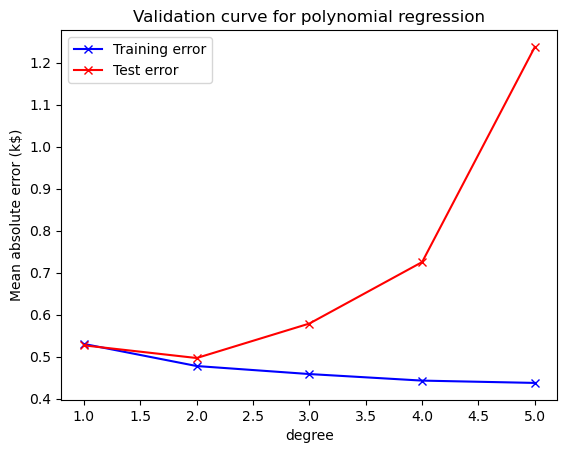

In [28]:
degree = [1, 2, 3, 4, 5]
train_scores, test_scores = validation_curve(
    poly_reg_pipeline, com_train_features, com_train_labels, param_name="poly__degree",
    param_range=degree, cv=cv, scoring="neg_mean_absolute_error",
    n_jobs=2)

train_errors, test_errors = -train_scores, -test_scores
plt.plot(degree, train_errors.mean(axis=1), 'b-x', label="Training error")
plt.plot(degree, test_errors.mean(axis=1), 'r-x', label="Test error")
plt.legend()

plt.xlabel("degree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for polynomial regression")

<a id="selecting-optimal-degree"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>SELECTING THE OPTIMAL POLYNOMIAL DEGREE</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    To identify the most effective polynomial degree, we focus on the degree that results in the lowest mean absolute error. In our analysis, a degree of <strong>2</strong> emerges as the optimal choice, as it yields the minimum mean absolute error. This degree will be selected for our polynomial regression model, ensuring a balance between model complexity and predictive accuracy.
</p>
</div>

<a id="ridge-regression"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>RIDGE REGRESSION</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    Polynomial models, particularly those with higher-order features, are prone to overfitting. To mitigate this, we utilize Ridge regression, which incorporates a regularization term to penalize excessive model complexity. For this analysis, we set the regularization rate <code>alpha</code> to <strong>0.5</strong> and train the regression model accordingly.
    <br><br>
    Subsequently, we will perform a hyperparameter search to determine the optimal value of <code>alpha</code> that minimizes cross-validation errors, ensuring an effective balance between model complexity and generalization.
</p>
</div>

In [29]:
ridge_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2)),
                              ("feature_scaling", StandardScaler()),
                              ("ridge", Ridge(alpha=0.5))])
ridge_reg_cv_results = cross_validate(ridge_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

ridge_reg_train_error = -1 * ridge_reg_cv_results['train_score']
ridge_reg_test_error = -1 * ridge_reg_cv_results['test_score']

print(f"Mean absolute error of ridge regression model (alpha=0.5) on the train set:\n"
      f"{ridge_reg_train_error.mean():.3f} +/- {ridge_reg_train_error.std():.3f}")
print(f"Mean absolute error of ridge regression model (alpha=0.5) on the test set:\n"
      f"{ridge_reg_test_error.mean():.3f} +/- {ridge_reg_test_error.std():.3f}")

Mean absolute error of ridge regression model (alpha=0.5) on the train set:
0.481 +/- 0.003
Mean absolute error of ridge regression model (alpha=0.5) on the test set:
0.487 +/- 0.006


<a id="hpt-ridge-regularization-rate"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>HYPERPARAMETER TUNING FOR RIDGE REGULARIZATION RATE</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    To identify the optimal regularization rate <code>alpha</code> for Ridge regression, we perform hyperparameter tuning. This process involves evaluating a range of <code>alpha</code> values to determine which one results in the lowest cross-validation errors.
    <br><br>
    We will systematically test different values of <code>alpha</code> and use cross-validation to assess the model's performance for each value. The optimal <code>alpha</code> is selected based on which value yields the best balance between model fit and generalization, minimizing cross-validation errors.
</p>
</div>

In [30]:
alpha_list = np.logspace(-4, 0, num=20)
ridge_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2)),
                              ("feature_scaling", StandardScaler()),
                              ("ridge_cv", RidgeCV(alphas=alpha_list,
                                                   cv=cv,
                                                   scoring="neg_mean_absolute_error"))])
ridge_reg_cv_results = ridge_reg_pipeline.fit(com_train_features, com_train_labels)

In [31]:
print ("The score with the best alpha is:",
       f"{ridge_reg_cv_results[-1].best_score_:.3f}")
print ("The error with the best alpha is:",
       f"{-ridge_reg_cv_results[-1].best_score_:.3f}")

The score with the best alpha is: -0.473
The error with the best alpha is: 0.473


In [32]:
print ("The best value for alpha:", ridge_reg_cv_results[-1].alpha_)

The best value for alpha: 0.007847599703514606


<a id="ridgecv-with-cross-validation"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>RIDGECV WITH CROSS VALIDATION</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    To identify the optimal regularization rate <code>alpha</code> for Ridge regression, we use <code>RidgeCV</code>, which performs cross-validation to select the best <code>alpha</code> from a specified list of candidate values.
    <br><br>
    We will provide a range of <code>alpha</code> values to <code>RidgeCV</code> and allow it to evaluate each value's performance through cross-validation. The best <code>alpha</code> is chosen based on which one minimizes cross-validation errors, ensuring that our model achieves the best balance between fit and generalization.
</p>
</div>

In [33]:
alpha_list = np.logspace(-4, 0, num=20)
ridge_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2)),
                              ("feature_scaling", StandardScaler()),
                              ("ridge_cv", RidgeCV(alphas=alpha_list,
                                                   store_cv_values=True))])
ridge_reg_cv_results = cross_validate(ridge_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

ridge_reg_train_error = -1 * ridge_reg_cv_results['train_score']
ridge_reg_test_error = -1 * ridge_reg_cv_results['test_score']

print(f"Mean absolute error of ridge regression model on the train set:\n"
      f"{ridge_reg_train_error.mean():.3f} +/- {ridge_reg_train_error.std():.3f}")
print(f"Mean absolute error of ridge regression model on the test set:\n"
      f"{ridge_reg_test_error.mean():.3f} +/- {ridge_reg_test_error.std():.3f}")

Mean absolute error of ridge regression model on the train set:
0.470 +/- 0.011
Mean absolute error of ridge regression model on the test set:
0.474 +/- 0.011


**Let's look at the mean of mean absolute errors at different values of regularization rate across different cross validation folds.**

In [34]:
mse_alphas = [est[-1].cv_values_.mean(axis=0)
              for est in ridge_reg_cv_results["estimator"]]
cv_alphas = pd.DataFrame(mse_alphas, columns=alpha_list)
cv_alphas

,0.000100,0.000162,0.000264,0.000428,0.000695,0.001129,0.001833,0.002976,0.004833,0.007848,0.012743,0.020691,0.033598,0.054556,0.088587,0.143845,0.233572,0.379269,0.615848,1.000000
0,79.825105,83.556980,89.052274,96.713331,106.577419,117.958587,129.309234,138.553545,143.696596,143.239844,136.323827,122.943609,104.328753,82.970054,61.840053,43.298869,28.559398,17.803633,10.526486,5.909713
1,14.065799,13.742714,13.245802,12.504952,11.450787,10.048351,8.345884,6.505474,4.765508,3.333758,2.295126,1.610844,1.183945,0.919624,0.750990,0.641272,0.577008,0.556458,0.575055,0.616682
2,5.267710,5.272331,5.279626,5.290956,5.308105,5.333104,5.367714,5.412616,5.466685,5.526801,5.588436,5.647108,5.700570,5.751087,5.806722,5.879665,5.978467,6.094229,6.190664,6.210415
3,5.853085,5.867043,5.888945,5.922643,5.972982,6.045051,6.142429,6.264704,6.405584,6.553176,6.692444,6.808469,6.889793,6.931979,6.940661,6.931633,6.923902,6.924670,6.915607,6.852967
4,8.134646,7.993974,7.781172,7.471108,7.042443,6.489075,5.830605,5.110992,4.379774,3.666586,2.970194,2.275449,1.595598,1.021163,0.731173,0.912456,1.609059,2.646320,3.729320,4.609697
5,66.100008,60.047159,52.002193,42.279138,31.879141,22.232981,14.513912,9.100108,5.651189,3.553748,2.267632,1.438728,0.884846,0.552525,0.464962,0.651161,1.080903,1.657819,2.268932,2.827886
6,2.309882,2.253722,2.168544,2.044094,1.871808,1.650275,1.391207,1.120910,0.873056,0.675781,0.543603,0.482411,0.504610,0.643451,0.952959,1.480223,2.215475,3.063332,3.875894,4.520391
7,19.019937,20.494095,22.742542,26.033396,30.548208,36.182667,42.368884,48.126041,52.384040,54.327657,53.538865,50.004599,44.134732,36.750467,28.898463,21.529074,15.270441,10.392246,6.862006,4.445108
8,4.351827,4.345297,4.335085,4.319448,4.296236,4.263277,4.219299,4.165380,4.106281,4.050251,4.006641,3.983150,3.985501,4.019862,4.095335,4.222623,4.405521,4.627181,4.842507,4.987779
9,3.963850,3.952362,3.934504,3.907436,3.867958,3.813571,3.744526,3.666285,3.590431,3.532157,3.505531,3.520803,3.586362,3.713344,3.917635,4.213494,4.596544,5.025147,5.419899,5.688782


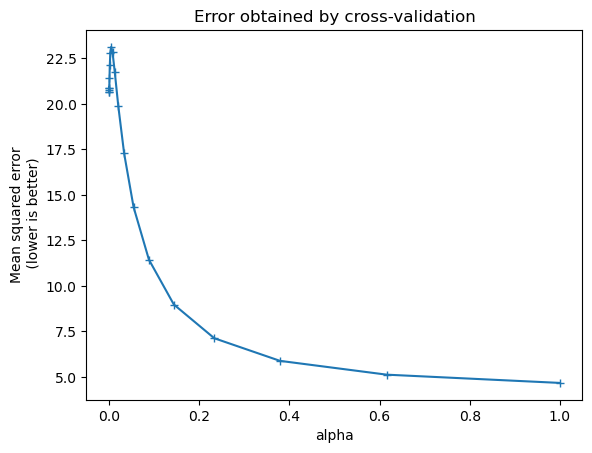

In [35]:
cv_alphas.mean(axis=0).plot(marker="+")
plt.ylabel("Mean squared error\n (lower is better)")
plt.xlabel("alpha")
_ = plt.title("Error obtained by cross-validation")

In [36]:
best_alphas = [est[-1].alpha_ for est in ridge_reg_cv_results["estimator"]]
best_alphas

[1.0,
 0.3792690190732246,
 0.0001,
 0.0001,
 0.08858667904100823,
 0.08858667904100823,
 0.0206913808111479,
 1.0,
 0.0206913808111479,
 0.012742749857031334]

<a id="ridgecv-final-estimate"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>RIDGECV FINAL ESTIMATE</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    The optimal regularization strength for Ridge regression, as determined by <code>RidgeCV</code>, may vary across different cross-validation iterations. 
    <br><br>
    However, it is standard practice to average the best <code>alpha</code> values found across multiple cross-validation folds. This approach provides a robust final estimate for the regularization parameter, reflecting the overall performance of the model across different data samples.
</p>
</div>

In [37]:
print(f"The mean optimal alpha leading to the best generalization performance is:\n"
      f"{np.mean(best_alphas):.2f} +/- {np.std(best_alphas):.2f}")

The mean optimal alpha leading to the best generalization performance is:
0.26 +/- 0.38



<a id="ridge-hpt-gridsearchcv"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>RIDGE HPT THROUGH `GRIDSEARCHCV`</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    To identify the optimal regularization strength for Ridge regression, we can use <code>GridSearchCV</code> for hyperparameter tuning. 
    <br><br>

In [38]:
ridge_grid_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2)),
                              ("feature_scaling", StandardScaler()),
                              ("ridge", Ridge())])

param_grid = {'poly__degree': (1, 2, 3),
              'ridge__alpha': np.logspace(-4, 0, num=20)}
ridge_grid_search = GridSearchCV(ridge_grid_pipeline,
                                 param_grid=param_grid,
                                 n_jobs=2,
                                 cv=cv,
                                 scoring="neg_mean_absolute_error",
                                 return_train_score=True)
ridge_grid_search.fit(com_train_features, com_train_labels)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('feature_scaling', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=2,
             param_grid={'poly__degree': (1, 2, 3),
                         'ridge__alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00])},
             return_train_score=True, scoring='neg_mean_absolute_error')

**`ridge_grid_search.best_index_` gives us the index of the best parameter in the list**

In [39]:
mean_train_error = -1*ridge_grid_search.cv_results_['mean_train_score'][ridge_grid_search.best_index_]
mean_test_error = -1*ridge_grid_search.cv_results_['mean_test_score'][ridge_grid_search.best_index_]
std_train_error = ridge_grid_search.cv_results_['std_train_score'][ridge_grid_search.best_index_]
std_test_error = ridge_grid_search.cv_results_['std_train_score'][ridge_grid_search.best_index_]

print(f"Best Mean absolute error of polynomial ridge regression model on the train set:\n"
      f"{mean_train_error:.3f} +/- {std_train_error:.3f}")
print(f"Mean absolute error of polynomial ridge regression model on the test set:\n"
      f"{mean_test_error:.3f} +/- {std_test_error:.3f}")

Best Mean absolute error of polynomial ridge regression model on the train set:
0.463 +/- 0.004
Mean absolute error of polynomial ridge regression model on the test set:
0.474 +/- 0.004


In [40]:
print ("Mean cross validated score of the best estimator is: ", ridge_grid_search.best_score_)
print ("Mean cross validated error of the best estimator is: ", -ridge_grid_search.best_score_)

Mean cross validated score of the best estimator is:  -0.47386511770044537
Mean cross validated error of the best estimator is:  0.47386511770044537


**Note that this is same as RidgeCV that we carried out earlier.**

In [41]:
print ("The best parameter value is:", ridge_grid_search.best_params_)

The best parameter value is: {'poly__degree': 2, 'ridge__alpha': 0.007847599703514606}


<a id="lasso-regression-baseline"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>LASSON REGRESSION: BASELINE MODEL WITH FIXED LEARNING RATE</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    In this section, we will explore Lasso regression by setting up a baseline model with a fixed learning rate.

In [42]:
lasso_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2)),
                              ("feature_scaling", StandardScaler()),
                              ("lasso", Lasso(alpha=0.01))])
lasso_reg_cv_results = cross_validate(lasso_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

lasso_reg_train_error = -1 * lasso_reg_cv_results['train_score']
lasso_reg_test_error = -1 * lasso_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
      f"{lasso_reg_train_error.mean():.3f} +/- {ridge_reg_train_error.std():.3f}")
print(f"Mean absolute error of linear regression model on the test set:\n"
      f"{lasso_reg_test_error.mean():.3f} +/- {ridge_reg_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.529 +/- 0.011
Mean absolute error of linear regression model on the test set:
0.528 +/- 0.011


<a id="hpt-lasso-regularization-rate"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>HYPERPARAMETER TUNING FOR LASSO REGULARIZATION RATE WITH CROSS VALIDATION</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    In this section, we will perform hyperparameter tuning for the Lasso regression model to find the optimal regularization rate using cross-validation.

In [43]:
alpha_list = np.logspace(-6, 0, num=20)
lasso_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2)),
                              ("feature_scaling", StandardScaler()),
                              ("lasso_cv", LassoCV(alphas=alpha_list, cv=cv))])
lasso_reg_cv_results = cross_validate(lasso_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

lasso_reg_train_error = -1 * lasso_reg_cv_results['train_score']
lasso_reg_test_error = -1 * lasso_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
      f"{lasso_reg_train_error.mean():.3f} +/- {lasso_reg_train_error.std():.3f}")
print(f"Mean absolute error of linear regression model on the test set:\n"
      f"{lasso_reg_test_error.mean():.3f} +/- {lasso_reg_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.524 +/- 0.015
Mean absolute error of linear regression model on the test set:
0.524 +/- 0.013


In [44]:
best_alphas = [est[-1].alpha_ for est in lasso_reg_cv_results["estimator"]]
best_alphas

[0.012742749857031322,
 0.012742749857031322,
 0.00615848211066026,
 0.00615848211066026,
 0.00615848211066026,
 1e-06,
 0.012742749857031322,
 0.0003359818286283781,
 0.00615848211066026,
 0.026366508987303555]

In [45]:
print(f"The mean optimal alpha leading to the best generalization performance is:\n"
      f"{np.mean(best_alphas):.2f} +/- {np.std(best_alphas):.2f}")

The mean optimal alpha leading to the best generalization performance is:
0.01 +/- 0.01


In [46]:
lasso_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2)),
                              ("feature_scaling", StandardScaler()),
                              ("lasso", Lasso(alpha=0.01))])
lasso_reg_pipeline.fit(com_train_features, com_train_labels)
train_error = mean_absolute_error(com_train_labels,
                                 lasso_reg_pipeline.predict(com_train_features))

print(f"Mean absolute error of Lasso CV model on the train set:", train_error)

Mean absolute error of Lasso CV model on the train set: 0.5291330037868301


**with GridSearchCV**

In [47]:
lasso_grid_pipeline = Pipeline([("poly", PolynomialFeatures()),
                              ("feature_scaling", StandardScaler()),
                              ("lasso", Lasso())])

param_grid = {'poly__degree': (1, 2, 3),
              'lasso__alpha': np.logspace(-4, 0, num=20)}
lasso_grid_search = GridSearchCV(lasso_grid_pipeline,
                                 param_grid=param_grid,
                                 n_jobs=2,
                                 cv=cv,
                                 scoring="neg_mean_absolute_error",
                                 return_train_score=True)
lasso_grid_search.fit(com_train_features, com_train_labels)

/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.553e+03, tolerance: 1.658e+00
  model = cd_fast.enet_coordinate_descent(
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.280e+03, tolerance: 1.654e+00
  model = cd_fast.enet_coordinate_descent(
/Users/zsomborveres-lakos/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('feature_scaling', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=2,
             param_grid={'lasso__alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00]),
                         'poly__degree': (1, 2, 3)},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [48]:
mean_train_error = -1*lasso_grid_search.cv_results_['mean_train_score'][lasso_grid_search.best_index_]
mean_test_error = -1*lasso_grid_search.cv_results_['mean_test_score'][lasso_grid_search.best_index_]
std_train_error = lasso_grid_search.cv_results_['std_train_score'][lasso_grid_search.best_index_]
std_test_error = lasso_grid_search.cv_results_['std_train_score'][lasso_grid_search.best_index_]

print(f"Best Mean absolute error of polynomial ridge regression model on the train set:\n"
      f"{mean_train_error:.3f} +/- {std_train_error:.3f}")
print(f"Mean absolute error of polynomial ridge regression model on the test set:\n"
      f"{mean_test_error:.3f} +/- {std_test_error:.3f}")

Best Mean absolute error of polynomial ridge regression model on the train set:
0.462 +/- 0.003
Mean absolute error of polynomial ridge regression model on the test set:
0.488 +/- 0.003


In [49]:
print ("Mean cross validated score of the best estimator is: ", lasso_grid_search.best_score_)

Mean cross validated score of the best estimator is:  -0.48798304453391284


In [50]:
print ("The best parameter value is:", lasso_grid_search.best_params_)

The best parameter value is: {'lasso__alpha': 0.0001, 'poly__degree': 3}


<a id="sgd-regularization-hpt"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>SGD REGRESSION: REGULARIZATION AND HYPERPARAMETER TUNING</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    Stochastic Gradient Descent (SGD) is another method for regularization in linear regression. Unlike standard Linear Regression, SGDRegressor includes additional hyperparameters that need careful tuning to match or exceed the performance of other regression models.

In [51]:
poly_sgd_pipeline = Pipeline([("poly", PolynomialFeatures()),
                              ("feature_scaling", StandardScaler()),
                              ("sgd_reg", SGDRegressor(
                                 penalty='elasticnet',
                                 random_state=42))])
poly_sgd_cv_results = cross_validate(poly_sgd_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

poly_sgd_train_error = -1 * poly_sgd_cv_results['train_score']
poly_sgd_test_error = -1 * poly_sgd_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
      f"{poly_sgd_train_error.mean():.3f} +/- {poly_sgd_train_error.std():.3f}")
print(f"Mean absolute error of linear regression model on the test set:\n"
      f"{poly_sgd_test_error.mean():.3f} +/- {poly_sgd_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
10824283052.546 +/- 4423288211.832
Mean absolute error of linear regression model on the test set:
10946788540.250 +/- 5396536227.703


<a id="search-best-parameters-randomizedsearchcv"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>SEARCHING FOR BEST PARAMETERS WITH RANDOMIZEDSEARCHCV</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    To find the optimal set of parameters for the Polynomial + SGD pipeline, we will use <code>RandomizedSearchCV</code>. This technique allows us to efficiently search through a range of hyperparameters to identify the best combination for our model.

In [52]:
class uniform_int:
    """Integer valued version of the uniform distribution"""
    def __init__(self, a, b):
        self._distribution = uniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)

**Let's specify RandomizedSearchCV set up.**

In [53]:
param_distributions = {
    'poly__degree': [1, 2, 3],
    'sgd_reg__learning_rate': ['constant', 'adaptive', 'invscaling'],
    'sgd_reg__l1_ratio': uniform(0, 1),
    'sgd_reg__eta0': loguniform(1e-5, 1),
    'sgd_reg__power_t': uniform(0, 1)
}

poly_sgd_random_search = RandomizedSearchCV(
    poly_sgd_pipeline, param_distributions=param_distributions,
    n_iter=10, cv=cv, verbose=1, scoring='neg_mean_absolute_error'
)
poly_sgd_random_search.fit(com_train_features, com_train_labels)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
                   estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                             ('feature_scaling',
                                              StandardScaler()),
                                             ('sgd_reg',
                                              SGDRegressor(penalty='elasticnet',
                                                           random_state=42))]),
                   param_distributions={'poly__degree': [1, 2, 3],
                                        'sgd_reg__eta0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1681a6f90>,
                                        'sgd_reg__l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16818ae90>,
                                        'sgd_reg__learning_rate': ['constant',
                                                                   'adaptive',
                                                                   'invscaling'],
                                        'sgd_reg__power_t': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1681a4690>},
                   scoring='neg_mean_absolute_error', verbose=1)

In [54]:
poly_sgd_random_search.best_score_

-0.5273014585580171

In [55]:
poly_sgd_random_search.best_params_

{'poly__degree': 1,
 'sgd_reg__eta0': 0.00015476270108098552,
 'sgd_reg__l1_ratio': 0.5485428561088888,
 'sgd_reg__learning_rate': 'constant',
 'sgd_reg__power_t': 0.4907965441139148}

**And the best estimator can be accessed with best_estimator_ member variable.**

<a id="comparison-of-weight-vectors"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>COMPARISON OF WEIGHT VECTORS</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    In this section, we will compare the weight vectors produced by different regression models. The weight vectors provide insights into the importance of each feature in predicting the target variable.

In [56]:
feature_names = poly_reg_cv_results["estimator"][0][0].get_feature_names_out(
    input_features=train_features.columns)
feature_names

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge AveRooms', 'HouseAge AveBedrms', 'HouseAge Population',
       'HouseAge AveOccup', 'HouseAge Latitude', 'HouseAge Longitude',
       'AveRooms AveBedrms', 'AveRooms Population', 'AveRooms AveOccup',
       'AveRooms Latitude', 'AveRooms Longitude', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup Latitude', 'AveOccup Longitude',
       'Latitude Longitude'], dtype=object)

In [57]:
coefs = [est[-1].coef_ for est in poly_reg_cv_results["estimator"]]
weights_polynomial_regression = pd.DataFrame(coefs, columns=feature_names)

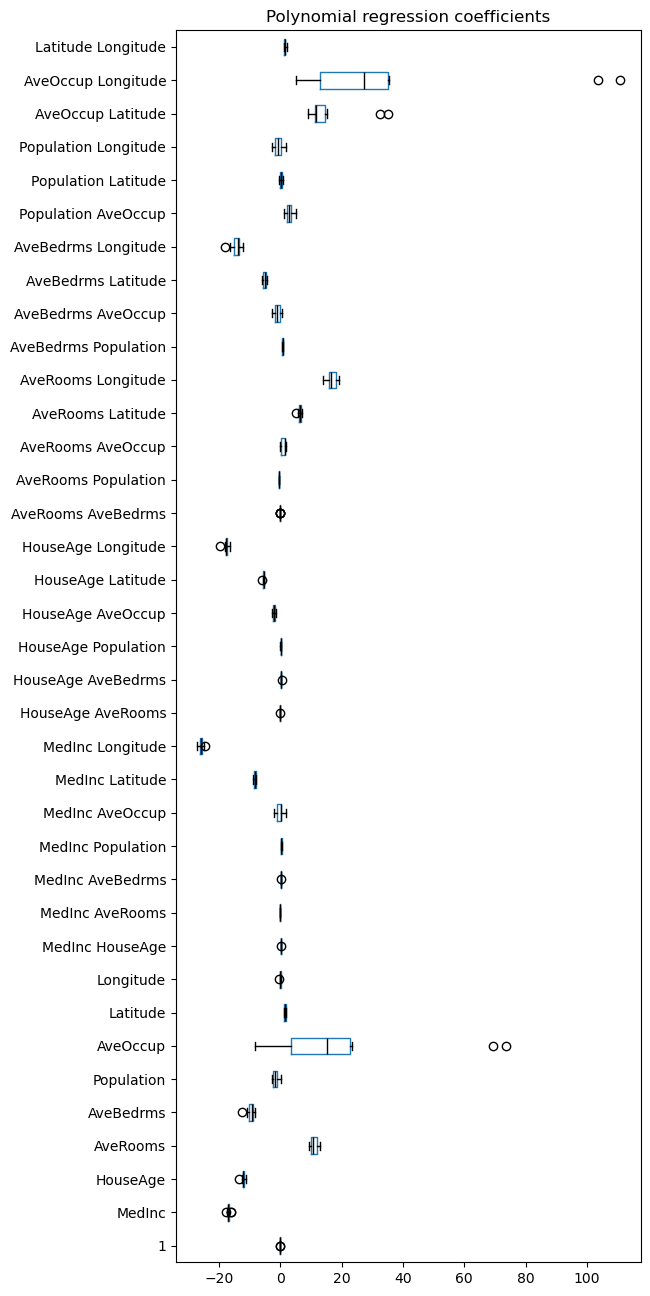

In [58]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_polynomial_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Polynomial regression coefficients")

In [59]:
feature_names = ridge_reg_cv_results["estimator"][0][0].get_feature_names_out(
    input_features=train_features.columns)
feature_names

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

In [60]:
coefs = [est[-1].coef_ for est in ridge_reg_cv_results["estimator"]]
weights_ridge_regression = pd.DataFrame(coefs, columns=feature_names)

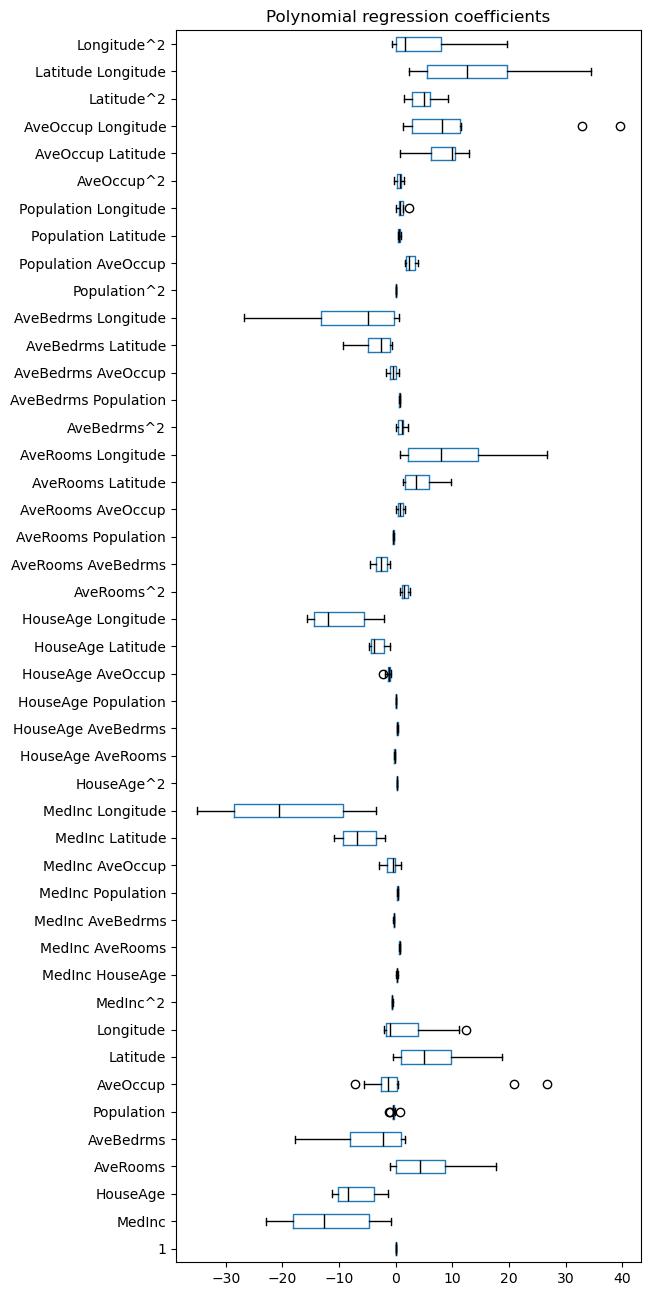

In [61]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_ridge_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Polynomial regression coefficients")

<a id="performance-on-the-test-set"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>PERFORMANCE ON THE TEST SET</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">

<a id="baseline"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>BASELINE</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">

In [62]:
baseline_model_median = DummyRegressor(strategy='median')
baseline_model_median.fit(train_features, train_labels)
mean_absolute_percentage_error(test_labels,
                               baseline_model_median.predict(test_features))

0.5348927548151625


<a id="linear-regression-with-normal-equation"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>LINEAR REGRESSION WITH NORMAL EQUATION</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">

In [63]:
mean_absolute_percentage_error(test_labels,
                               lin_reg_cv_results['estimator'][0].predict(
                                   test_features))

0.3212047217548291

In [64]:
mean_absolute_percentage_error(test_labels,
                               poly_sgd_random_search.best_estimator_.predict(
                                   test_features))

0.31853708738268743


<a id="polynomial-regression"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>POLYNOMIAL REGRESSION</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">

In [65]:
poly_reg_pipeline.fit(com_train_features, com_train_labels)
mean_absolute_percentage_error(test_labels,
                               poly_reg_pipeline.predict(test_features))

0.2819975908265792

<a id="ridge-regression"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>RIDGE REGRESSION</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">

In [66]:
mean_absolute_percentage_error(test_labels,
                               ridge_grid_search.best_estimator_.predict(test_features))

0.27110336451477224

<a id="lasso-regression"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>LASSO REGRESSION</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    We will retrain the Lasso regression model using the optimal <code>alpha</code> value identified through hyperparameter tuning. After retraining the model, we will evaluate its performance on the test data to assess its effectiveness.
</p>
</div>

In [67]:
mean_absolute_percentage_error(test_labels,
                               lasso_grid_search.best_estimator_.predict(test_features))

0.280749692638101

<a id="summary"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>SUMMARY</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
    We trained multiple linear regression models on the housing dataset, optimizing their hyperparameters through systematic hyperparameter tuning. After identifying the best hyperparameters, we retrained the models and evaluated their performance on a test set that was reserved for final assessment.
    <br><br>
    This approach mirrors how real-world problems are typically addressed, starting with simple models and progressively advancing to more sophisticated techniques as needed.
</p>
</div>